In [13]:
import numpy as np
import pandas as pd
import sympy
from PIL import Image

import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, Resize, ToTensor, Grayscale

import matplotlib.pyplot as plt
import seaborn as sns
from qbstyles import mpl_style

from sklearn.metrics import r2_score

mpl_style(dark=True)

In [42]:
class MyModel(nn.Module):
    def __init__(self, w=1, b=1):
        self.w = torch.tensor(w, dtype=torch.float, requires_grad=True)
        self.b = torch.tensor(b, dtype=torch.float, requires_grad=True)
    
    def forward(self, X):
        return self.w * X + self.b
    
    def criterion(self, Yhat, Y):
        return torch.mean((Yhat - Y) ** 2)
    
    def fit(self, dataloader, epochs=10, alpha=0.1):
        losses = []
        for _ in range(epochs):
            for X_batch, Y_batch in dataloader:
                Yhat = self.forward(X_batch)
                loss = self.criterion(Yhat, Y_batch)
                loss.backward()
                with torch.no_grad():
                    self.w -= alpha * self.w.grad
                    self.b -= alpha * self.b.grad
                self.w.grad.zero_()
                self.b.grad.zero_()
                losses.append(loss.item())
        
        return losses
    
    def predict(self, X):
        return self.forward(X).detach()

class MyDataset(Dataset):
    def __init__(self, samples, targets):
        self.samples = samples
        self.targets = targets
    
    def __len__(self):
        return len(self.samples)
    
    def __getitem__(self, index):
        return self.samples[index], self.targets[index]

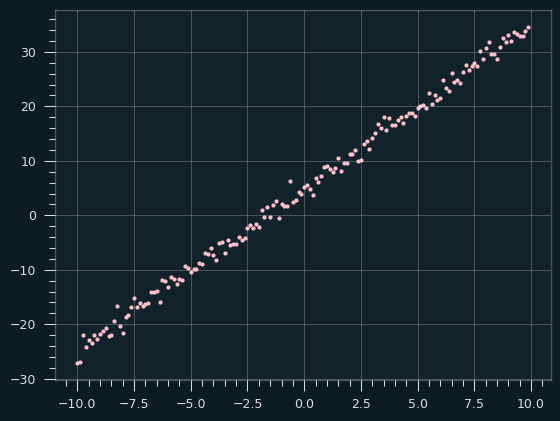

In [17]:
X = torch.arange(-10, 10, 0.125).reshape(-1, 1)
f = 3 * X + 5
noise = 1 * torch.randn(X.shape)
Y = noise + f

plt.scatter(X, Y, color="pink", marker='.')

[326.4664306640625, 210.81883239746094, 46.365936279296875, 62.02049255371094, 30.443878173828125, 26.420808792114258, 9.577438354492188, 13.21336555480957, 5.173774719238281, 3.1267940998077393, 1.3341543674468994, 7.326314449310303, 5.991032123565674, 0.013998829759657383, 6.507575035095215, 2.968707799911499, 9.998815536499023, 0.004144376143813133, 0.0027018231339752674, 1.43203866481781, 5.821897506713867, 0.012092581950128078, 0.27003759145736694, 0.15934120118618011, 0.033213332295417786, 0.057033661752939224, 2.0398199558258057, 0.9472813010215759, 0.6737608909606934, 2.3276400566101074, 4.998203754425049, 2.5242505073547363, 0.0011455450439825654, 2.6056158542633057, 0.7585036158561707, 0.19022980332374573, 0.022584937512874603, 0.06067107990384102, 4.044637680053711, 1.6825402975082397, 0.07379596680402756, 0.2436370849609375, 0.022465281188488007, 0.7651427388191223, 0.2147102952003479, 4.743694305419922, 2.59377121925354, 5.835882663726807, 0.4626825451850891, 0.25082561373

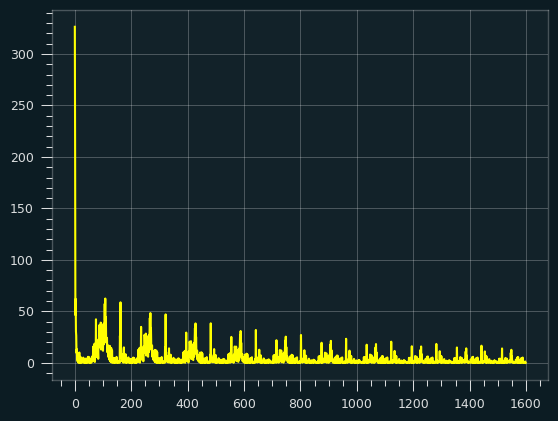

In [63]:
dataset = MyDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=1)
model = MyModel()
losses = model.fit(dataloader, alpha=0.001)
print(losses)
plt.plot(losses, color="yellow")

In [64]:
Y_pred = model.predict(dataset.samples)
accuracy = r2_score(Y_pred, Y) * 100
round(accuracy, 2)

99.42